In [52]:
# from getopt import getopt
# import cloudpickle
# import pickle
# import sys
# import os
import numpy as np
import pandas as pd
import seaborn as sns
# from scipy.special import logit, expit
from scipy.stats import uniform, norm, bernoulli
# from statsmodels.stats.proportion import proportions_ztest
from matplotlib import pyplot as plt
# import pymc as pm
# import arviz as az
# from modeltools import mcmc_diagnostics, create_summary_stat
# from downcast import downcast_df
# import jax
# from pymc.sampling_jax import sample_numpyro_nuts
# from time import time, sleep
# from datetime import timedelta

In [82]:
def jitter(arr, scale=1):
    return arr+uniform.rvs(-scale/2,scale,len(arr))

In [6]:
raters_df = pd.read_csv("data/simulations/sig_n_raters.csv")
p_raters_df =  pd.read_csv("data/simulations/sig_p_n_raters.csv")
scores_df = pd.read_csv("data/simulations/sig_scores_per_r.csv")
p_scores_df =  pd.read_csv("data/simulations/sig_p_scores_per_r.csv")

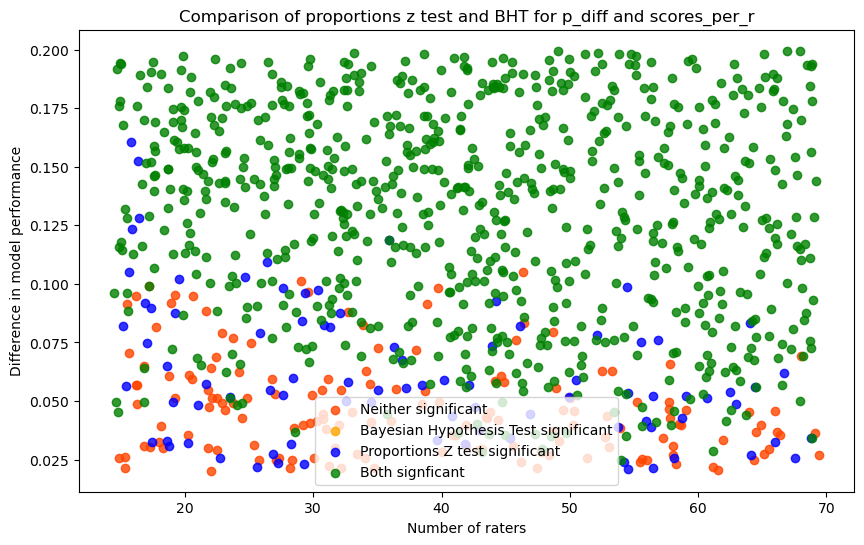

In [83]:
# Comparing prop z test and bh test under different number of raters
sim_results=p_raters_df

legend = {
    "orangered":"Neither significant",
    "orange":"Bayesian Hypothesis Test significant",
    "royalblue": "Proportions Z test significant",
    "forestgreen": "Both signficant"
}

alpha = 0.05
sim_results["propz"] = sim_results["propz_pval"] < alpha
sim_results["bht"] = sim_results["bht_pval"] < alpha

sim_results["c"] = np.select(
    condlist=[
        ~sim_results["propz"] & ~sim_results["bht"],
        ~sim_results["propz"] & sim_results["bht"],
        sim_results["propz"] & ~sim_results["bht"],
        sim_results["propz"] & sim_results["bht"]
    ],
    choicelist=["orangered", "yellow", "royalblue", "forestgreen"],
    default="black")

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    df = sim_results[sim_results["c"]==colour]
    ax.scatter(jitter(df["n_raters"]), df["p_diff"], c=colour, label=legend[colour], alpha=0.8)
ax.set_title("Comparison of proportions z test and BHT for p_diff and scores_per_r")
ax.set_ylabel("Difference in model performance")
ax.set_xlabel("Number of raters")
ax.legend()
plt.show()

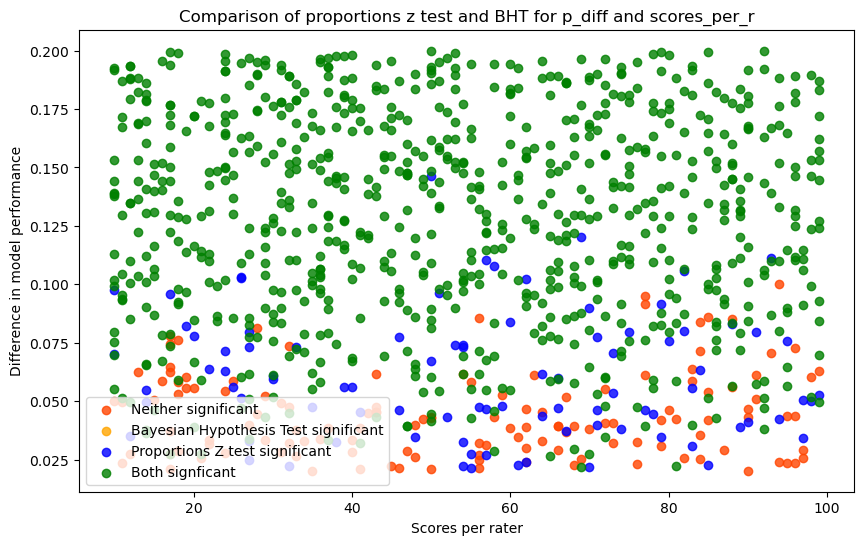

In [77]:
# Comparing prop z test and bh test under different number of raters
sim_results=p_scores_df

legend = {
    "orangered":"Neither significant",
    "orange":"Bayesian Hypothesis Test significant",
    "royalblue": "Proportions Z test significant",
    "forestgreen": "Both signficant"
}

alpha = 0.05
sim_results["propz"] = sim_results["propz_pval"] < alpha
sim_results["bht"] = sim_results["bht_pval"] < alpha

sim_results["c"] = np.select(
    condlist=[
        ~sim_results["propz"] & ~sim_results["bht"],
        ~sim_results["propz"] & sim_results["bht"],
        sim_results["propz"] & ~sim_results["bht"],
        sim_results["propz"] & sim_results["bht"]
    ],
    choicelist=["orangered", "yellow", "royalblue", "forestgreen"],
    default="black")

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    df = sim_results[sim_results["c"]==colour]
    ax.scatter(df["scores_per_r"], df["p_diff"], c=colour, label=legend[colour], alpha=0.8)
ax.set_title("Comparison of proportions z test and BHT for p_diff and scores_per_r")
ax.set_ylabel("Difference in model performance")
ax.set_xlabel("Scores per rater")
ax.legend()
plt.show()

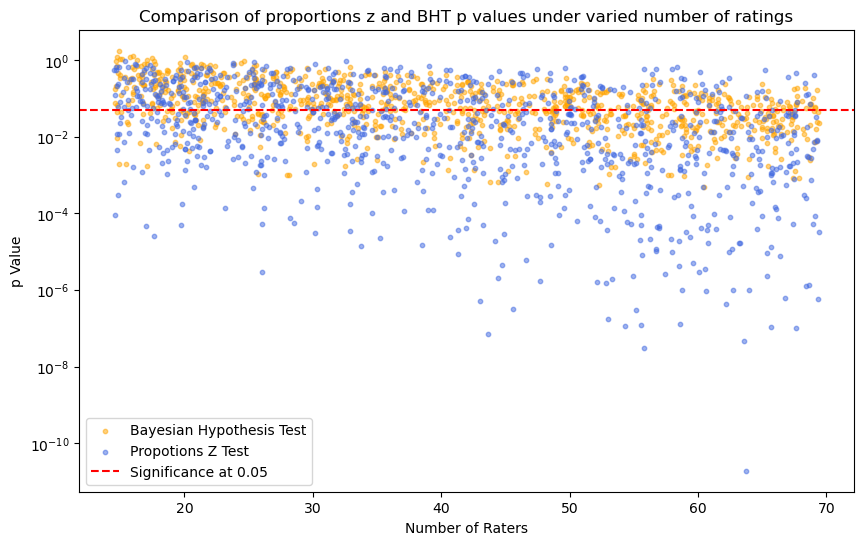

In [94]:
sim_results = raters_df
N = len(sim_results)
legend = {"royalblue":"Propotions Z Test", "orange":"Bayesian Hypothesis Test"}
test = {"royalblue":"propz", "orange":"bht"}

n_raters_arr = np.concatenate([np.array(sim_results["n_raters"]), np.array(sim_results["n_raters"])])
pval_arr = np.concatenate([np.array(sim_results["propz_pval"]), np.array(sim_results["bht_pval"])])
colour_arr = ["royalblue"]*len(sim_results) + ["orange"]*len(sim_results)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in reversed(legend):
    ax.scatter(jitter(sim_results["n_raters"]), sim_results[f"{test[colour]}_pval"],
               c=colour, label=legend[colour], s=10, alpha=0.5)
ax.axhline(y=0.05, color = 'r', linestyle = 'dashed', label="Significance at 0.05") 
ax.set_title("Comparison of proportions z and BHT p values under varied number of ratings")
ax.set_yscale("log")
ax.set_xlabel("Number of Raters")
ax.set_ylabel("p Value")
ax.legend()
plt.show()

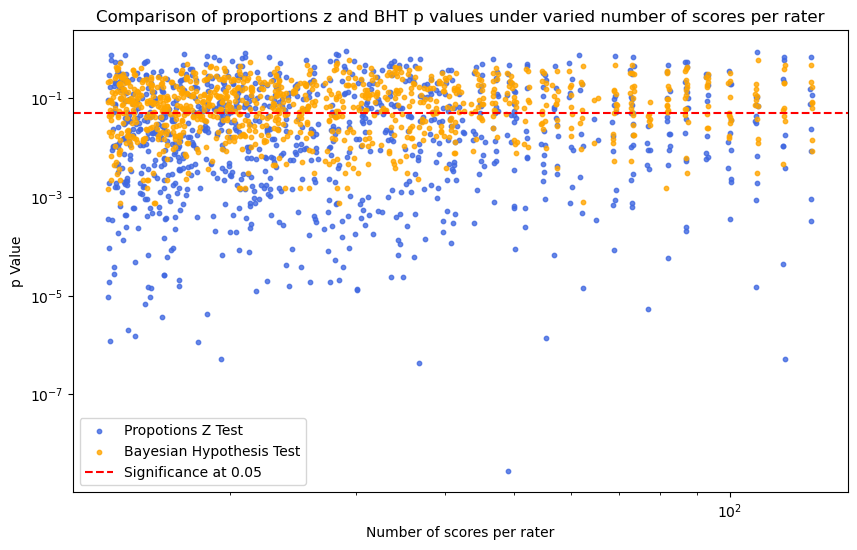

In [90]:
sim_results = scores_df
N = len(sim_results)
legend = {"royalblue":"Propotions Z Test", "orange":"Bayesian Hypothesis Test"}
test = {"royalblue":"propz", "orange":"bht"}

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    ax.scatter(jitter(sim_results["n_raters"]), sim_results[f"{test[colour]}_pval"],
               c=colour, label=legend[colour], s=10, alpha=0.8)
ax.axhline(y=0.05, color = 'r', linestyle = 'dashed', label="Significance at 0.05") 
ax.set_title("Comparison of proportions z and BHT p values under varied number of scores per rater")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Number of scores per rater")
ax.set_ylabel("p Value")
ax.legend()
plt.show()

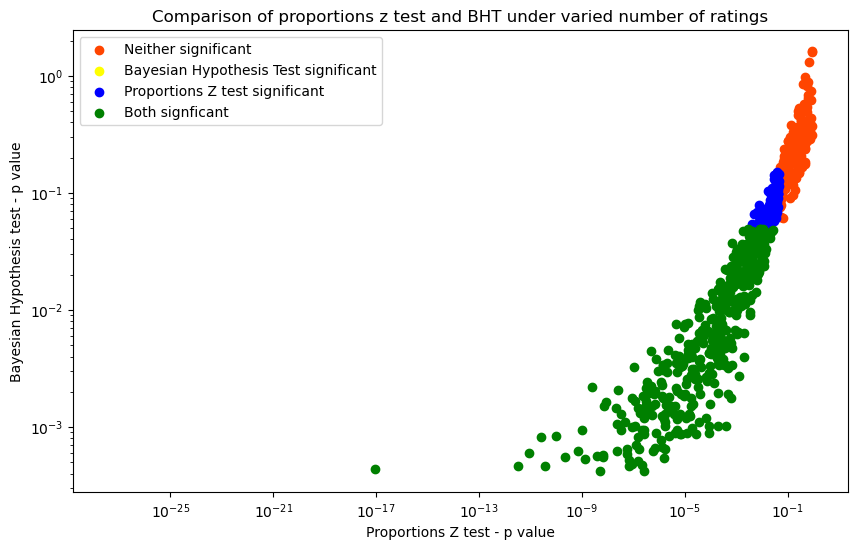

In [38]:
# Comparing prop z test and bh test under different number of raters
sim_results=p_raters_df

legend = {
    "orangered":"Neither significant",
    "orange":"Bayesian Hypothesis Test significant",
    "royalblue": "Proportions Z test significant",
    "forestgreen": "Both signficant"
}

alpha = 0.05
sim_results["propz"] = sim_results["propz_pval"] < alpha
sim_results["bht"] = sim_results["bht_pval"] < alpha

sim_results["c"] = np.select(
    condlist=[
        ~sim_results["propz"] & ~sim_results["bht"],
        ~sim_results["propz"] & sim_results["bht"],
        sim_results["propz"] & ~sim_results["bht"],
        sim_results["propz"] & sim_results["bht"]
    ],
    choicelist=["orangered", "orange", "royalblue", "forestgreen"],
    default="black")

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    df = sim_results[sim_results["c"]==colour]
    ax.scatter(df["propz_pval"], df["bht_pval"], c=colour, label=legend[colour])
ax.set_title("Comparison of proportions z test and BHT under varied number of ratings")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Proportions Z test - p value")
ax.set_ylabel("Bayesian Hypothesis test - p value")
ax.legend()
plt.show()

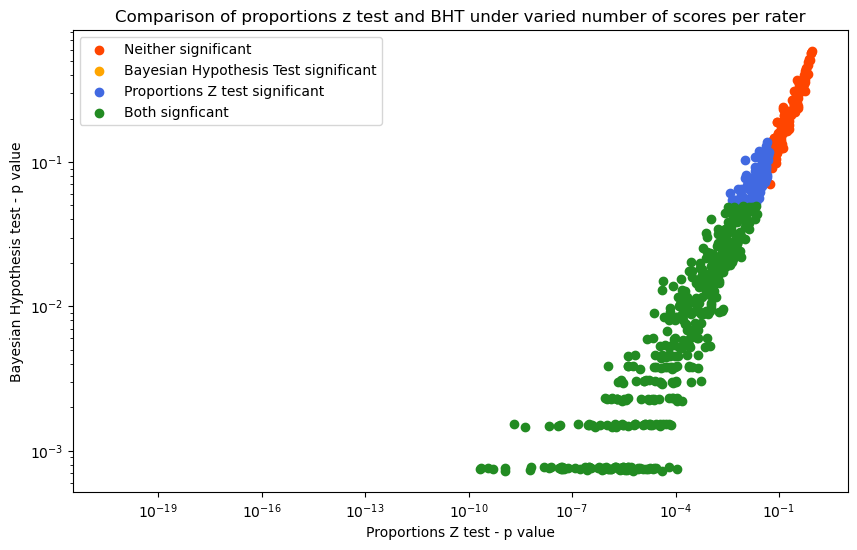

In [85]:
# Comparing prop z test and bh test under different number of raters
sim_results=p_scores_df

legend = {
    "orangered":"Neither significant",
    "orange":"Bayesian Hypothesis Test significant",
    "royalblue": "Proportions Z test significant",
    "forestgreen": "Both signficant"
}

alpha = 0.05
sim_results["propz"] = sim_results["propz_pval"] < alpha
sim_results["bht"] = sim_results["bht_pval"] < alpha

sim_results["c"] = np.select(
    condlist=[
        ~sim_results["propz"] & ~sim_results["bht"],
        ~sim_results["propz"] & sim_results["bht"],
        sim_results["propz"] & ~sim_results["bht"],
        sim_results["propz"] & sim_results["bht"]
    ],
    choicelist=["orangered", "yellow", "royalblue", "forestgreen"],
    default="black")

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    df = sim_results[sim_results["c"]==colour]
    ax.scatter(df["propz_pval"], df["bht_pval"], c=colour, label=legend[colour])
ax.set_title("Comparison of proportions z test and BHT under varied number of scores per rater")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Proportions Z test - p value")
ax.set_ylabel("Bayesian Hypothesis test - p value")
ax.legend()
plt.show()